## 复平面
$$
\begin{split}
e^{a+ib}=e^ae^{ib}=e^a\left(\cos b+i\sin b\right) \\
\end{split}
$$
## cis函数
$$
e^{ix} = \cos x + i\sin x
$$
- https://en.wikipedia.org/wiki/Cis_(mathematics)
- sin 视为复数的虚部,cos 视为复数的实部
$$
\begin{split}
e^{i\pi}+1=\left(\cos\pi + i\sin\pi\right) + 1 = -1 + 1=0 \\
\end{split}
$$
$e^{i\theta}$ 就是一个单位圆

## 旋转矩阵(rotation matrix)
$$
R(\theta)=\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}
$$

- $\|R(\theta)\|=1$,行列式为1
- 乘以一个向量,
    - 不改变其长度(norm)
    - 只改变其角度(只进行旋转)
    - 为逆时针旋转
    - 旋转角度 $\theta$ 为其与 $x$ 轴正方向的夹角

## 旋转矩阵的性质
$$
\begin{split}
R(\alpha)\cdot R(\beta)&=\begin{pmatrix}
\cos\alpha & -\sin\alpha\\
\sin\alpha & \cos\alpha
\end{pmatrix}\cdot \begin{pmatrix}
\cos\beta & -\sin\beta\\
\sin\beta & \cos\beta
\end{pmatrix}\\
&=\begin{pmatrix}
\cos\alpha\cos\beta-\sin\alpha\sin\beta & -(\cos\alpha\sin\beta+\sin\alpha\cos\beta)\\ 
\cos\alpha\sin\beta+\sin\alpha\cos\beta& \cos\alpha\cos\beta-\sin\alpha\sin\beta
\end{pmatrix}\\
&=\begin{pmatrix}
\cos(\alpha+\beta) & -\sin(\alpha+\beta)\\
\sin(\alpha+\beta) & \cos(\alpha+\beta)
\end{pmatrix}\\
&=R(\alpha+\beta)\\
R^T(\alpha)\cdot R(\beta)&=\begin{pmatrix}
\cos\alpha & \sin\alpha\\
-\sin\alpha & \cos\alpha
\end{pmatrix}\begin{pmatrix}
\cos\beta & -\sin\beta\\
\sin\beta & \cos\beta
\end{pmatrix}\\
&=R(-\alpha)R(\beta)\\
&=R(\beta-\alpha)
\end{split}
$$

## 旋转位置编码函数$f$
具体推导得到函数$f$的过程见[论文原文](https://arxiv.org/pdf/2104.09864.pdf),也可以参考[作者博客](https://zhuanlan.zhihu.com/p/359502624)
这里直接给出结论:
以Q或K中一个词向量($q$或$k$), 以及其位置下标$m$或$n$为输入, 输出新的词向量($\widetilde{q} 或 \widetilde{k} $)
$$
\begin{split}
f(q,m)&=qe^{im\theta}\\
\end{split}
$$
对于二维词向量$q = (q_0, q_1)$, 可以用旋转矩阵$R_m$表示为:
$$
\begin{split}
f(q,m)&=\begin{pmatrix}
\cos m\theta & -\sin m\theta\\
\sin m\theta & \cos m\theta
\end{pmatrix}\begin{pmatrix}
q_0\\
q_1
\end{pmatrix}\\
&=R_mq
\end{split}
$$
新的词向量具有以下性质:$\widetilde{q} \cdot \widetilde{k} $的结果只与 $q$ 和 $k$ 以及二者的相对位置$m-n$有关
$$
\begin{split}
f(q,m)^Tf(k,n)&=(R_mq)^T(R_nk)\\
&=q^T(R^T_mR_n)k\\
&=q^TR_{n-m}k
\end{split}
$$

## 多维词向量的旋转位置编码
对于$d$维词向量$q$,($d$必须为偶数),可以视作多个二维词向量,用$d/2$个旋转矩阵处理:
$$
\begin{equation}
\scriptsize{\underbrace{\begin{pmatrix} \cos m\theta_0 & -\sin m\theta_0 & 0 & 0 & \cdots & 0 & 0 \\
\sin m\theta_0 & \cos m\theta_0 & 0 & 0 & \cdots & 0 & 0 \\
0 & 0 & \cos m\theta_1 & -\sin m\theta_1 & \cdots & 0 & 0 \\
0 & 0 & \sin m\theta_1 & \cos m\theta_1 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & \cos m\theta_{d/2-1} & -\sin m\theta_{d/2-1} \\
0 & 0 & 0 & 0 & \cdots & \sin m\theta_{d/2-1} & \cos m\theta_{d/2-1} \\
\end{pmatrix}}_{\boldsymbol{W}_m}
\begin{pmatrix}q_0 \\
q_1 \\
q_2 \\
q_3 \\
\vdots \\
q_{d-2} \\
q_{d-1} \\
\end{pmatrix}}
\end{equation}
$$

由于$W_m$的稀疏性,直接用矩阵乘法来实现会很浪费算力,推荐通过下述方式来实现RoPE:
$$
\begin{equation}
\begin{pmatrix}q_0 \\ 
q_1 \\ 
q_2 \\ 
q_3 \\ 
\vdots \\ 
q_{d-2} \\ 
q_{d-1}  
\end{pmatrix}
\otimes
\begin{pmatrix}
\cos m\theta_0 \\ 
\cos m\theta_0 \\ 
\cos m\theta_1 \\ 
\cos m\theta_1 \\ 
\vdots \\ 
\cos m\theta_{d/2-1} \\ 
\cos m\theta_{d/2-1} 
\end{pmatrix} +
\begin{pmatrix}-q_1 \\ 
q_0 \\ 
-q_3 \\ 
q_2 \\ 
\vdots \\ 
-q_{d-1} \\ 
q_{d-2}  
\end{pmatrix}
\otimes
\begin{pmatrix}
\sin m\theta_0 \\ 
\sin m\theta_0 \\ 
\sin m\theta_1 \\ 
\sin m\theta_1 \\ 
\vdots \\ 
\sin m\theta_{d/2-1} \\ 
\sin m\theta_{d/2-1} 
\end{pmatrix}
\end{equation}
$$
其中$\otimes$是逐位对应相乘,即计算框架中的$*$运算。

## 复数乘法
$$
\begin{equation}
(a+bi)(c+di)&=(ac-bd)+(ad+bc)i \\
(q_0 + q_1i) * (\cos m\theta_0 + \sin m\theta_0i) &= ((q_0 \cos m\theta_0 - q_1 \sin m\theta_0) + (q_1 \cos m\theta_0 + q_0 \sin m\theta_0)i) \\
\end{equation}
$$
实部对应上节公式第0行,虚部对应上节公式第1行

## Meta官方版llama3源码中的RoPE实现
完整代码[点击这里](https://github.com/meta-llama/llama3/blob/main/llama/model.py)
核心计算基于极坐标和复数乘法实现

In [31]:
from typing import Tuple
import torch


def precompute_freqs_cis(dim: int, end: int, theta: float = 10000.0):
    # i是词向量中每个维度的位置下标
    # 计算公式中的 1/(10000^(2i/dim)),即 theta
    # 得到一个(dim/2,)维的向量
    freqs = 1.0 / (theta ** (torch.arange(0, dim, 2)[: (dim // 2)].float() / dim))
    print(freqs)
    # 初始化一个tensor [0, 1, 2, 3, ...],(end,)维
    t = torch.arange(end, device=freqs.device, dtype=torch.float32)
    # (end,) X (dim/2,) -> (end, dim/2)
    # 新的freqs第0行是freqs*0,第1行是freqs*1,第2行是freqs*2,...
    # freqs即公式中的 m*theta
    freqs = torch.outer(t, freqs)
    print(freqs[1])
    # 通过复平面极坐标计算sin和cos
    # 通过polar函数,将长度为1的向量逆时针旋转freqs度
    # freqs_cis的shape是(end, dim/2)
    # 每个元素是一个复数,实部是cos,虚部是sin
    freqs_cis = torch.polar(torch.ones_like(freqs), freqs)  # complex64
    return freqs_cis


def reshape_for_broadcast(freqs_cis: torch.Tensor, x: torch.Tensor):
    # ndim为x的维度数 ,此时应该为4
    ndim = x.ndim
    assert 0 <= 1 < ndim
    assert freqs_cis.shape == (x.shape[1], x.shape[-1])
    shape = [d if i == 1 or i == ndim - 1 else 1 for i, d in enumerate(x.shape)]
    # (1,x.shape[1],1,x.shape[-1])
    return freqs_cis.view(*shape)


def apply_rotary_emb(
    xq: torch.Tensor,
    xk: torch.Tensor,
    freqs_cis: torch.Tensor,
) -> Tuple[torch.Tensor, torch.Tensor]:
    # xq.shape = [bsz, seqlen, self.n_local_heads, self.head_dim]
    # torch.view_as_complex用于将二维向量转换为复数域 torch.view_as_complex即([q0,q1]) -> (q0 + q1 j)
    # 所以经过view_as_complex变换后xq_.shape = [bsz, seqlen, self.n_local_heads, self.head_dim//2]
    xq_ = torch.view_as_complex(xq.float().reshape(*xq.shape[:-1], -1, 2))
    xk_ = torch.view_as_complex(xk.float().reshape(*xk.shape[:-1], -1, 2))
    # freqs_cis.shape = (1,x.shape[1],1,x.shape[-1])
    freqs_cis = reshape_for_broadcast(freqs_cis, xq_)
    # xq_与freqs_cis广播哈达玛积, 两个复数的乘法实现
    # (q0 + q1 j) * (cos + sin j) = ((q0 cos - q1 sin) + (q1 cos + q0 sin)j)
    # [bsz, seqlen, self.n_local_heads, self.head_dim//2] * [1,seqlen,1,self.head_dim//2]
    # torch.view_as_real用于将复数再转换回实数向量, 再经过flatten展平第4个维度 
    # [bsz, seqlen, self.n_local_heads, self.head_dim//2] -> [bsz, seqlen, self.n_local_heads, self.head_dim//2,2] ->[bsz, seqlen, self.n_local_heads, self.head_dim]
    xq_out = torch.view_as_real(xq_ * freqs_cis).flatten(3)
    xk_out = torch.view_as_real(xk_ * freqs_cis).flatten(3)
    return xq_out.type_as(xq), xk_out.type_as(xk)

precompute_freqs_cis(6,10)

tensor([1.0000, 0.0464, 0.0022])
tensor([1.0000, 0.0464, 0.0022])


tensor([[ 1.0000+0.0000j,  1.0000+0.0000j,  1.0000+0.0000j],
        [ 0.5403+0.8415j,  0.9989+0.0464j,  1.0000+0.0022j],
        [-0.4161+0.9093j,  0.9957+0.0927j,  1.0000+0.0043j],
        [-0.9900+0.1411j,  0.9903+0.1388j,  1.0000+0.0065j],
        [-0.6536-0.7568j,  0.9828+0.1846j,  1.0000+0.0086j],
        [ 0.2837-0.9589j,  0.9732+0.2300j,  0.9999+0.0108j],
        [ 0.9602-0.2794j,  0.9615+0.2749j,  0.9999+0.0129j],
        [ 0.7539+0.6570j,  0.9477+0.3192j,  0.9999+0.0151j],
        [-0.1455+0.9894j,  0.9318+0.3629j,  0.9999+0.0172j],
        [-0.9111+0.4121j,  0.9140+0.4057j,  0.9998+0.0194j]])

## Hugging Face版llama3源码中的RoPE实现
完整代码[点击这里](https://github.com/huggingface/transformers/blob/main/src/transformers/models/llama/modeling_llama.py)
其对原始计算公式做了一些整理和改动
因为线性层是无序的,不依赖维度顺序信息,并不一定要求按照维度顺序一正一负两两组合对词向量进行取负数
也可以隔$d/2-1$个维度组一对
用矩阵表示为:
$$
\begin{equation}
\begin{pmatrix} 
\cos m\theta_0 & 0 & 0 & \cdots & 0 & -\sin m\theta_0 & 0 & 0 & \cdots & 0 \\
0 & \cos m\theta_1 & 0 & \cdots & 0 & 0 & -\sin m\theta_1 & 0 & \cdots & 0 \\
0 & 0 & \cos m\theta_2 & \cdots & 0 & 0 & 0 & -\sin m\theta_2 & \cdots & 0 \\
\vdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \vdots \\
0 & 0 & 0 & \cdots & \cos m\theta_{d/2-1} & 0 & 0 & 0 & \cdots & -\sin m\theta_{d/2-1}  \\
\sin m\theta_0 & 0 & 0 & \cdots & 0 & \cos m\theta_0 & 0 & 0 & \cdots & 0 \\
0 & \sin m\theta_1 & 0 & \cdots & 0 & 0 & \cos m\theta_1 & 0 & \cdots & 0 \\
0 & 0 & \sin m\theta_2 & \cdots & 0 & 0 & 0 & \cos m\theta_2 & \cdots & 0 \\
\vdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \vdots \\
0 & 0 & 0 & \cdots & \sin m\theta_{d/2-1} & 0 & 0 & 0 & \cdots & \cos m\theta_{d/2-1}  \\
\end{pmatrix}
\begin{pmatrix}q_0 \\ 
q_1 \\ 
q_2 \\
\vdots \\ 
q_{d/2-1} \\ 
q_{d/2} \\ 
q_{d/2+1} \\
q_{d/2+2} \\
\vdots \\
q_{d-1} \\ 
\end{pmatrix}
\end{equation}
$$

代码实现为:
$$
\begin{equation}
\begin{pmatrix}q_0 \\ 
q_1 \\ 
\vdots \\ 
q_{d/2-1} \\ 
q_{d/2} \\ 
q_{d/2+1} \\
\vdots \\
q_{d-1} \\ 
\end{pmatrix}
\otimes
\begin{pmatrix}
\cos m\theta_0 \\ 
\cos m\theta_1 \\ 
\vdots \\ 
\cos m\theta_{d/2-1} \\ 
\cos m\theta_0 \\ 
\cos m\theta_1 \\ 
\vdots \\ 
\cos m\theta_{d/2-1} \\ 
\end{pmatrix} +
\begin{pmatrix} 
-q_{d/2} \\ 
-q_{d/2+1} \\
\vdots \\
-q_{d-1} \\ 
q_0 \\ 
q_1 \\ 
\vdots \\ 
q_{d/2-1} \\ 
\end{pmatrix}
\otimes
\begin{pmatrix}
\sin m\theta_0 \\ 
\sin m\theta_1 \\ 
\vdots \\ 
\sin m\theta_{d/2-1} \\ 
\sin m\theta_0 \\ 
\sin m\theta_1 \\ 
\vdots \\ 
\sin m\theta_{d/2-1} \\ 
\end{pmatrix}
\end{equation}
$$
其中$\otimes$是逐位对应相乘,即计算框架中的$*$运算。

ChatGLM-6B、Baichuan2-7B、Google PaLM都采用了Hugging Face版RoPE实现思路

In [32]:
import torch
from torch import nn

class LlamaRotaryEmbedding(nn.Module):
    def __init__(self, dim, max_position_embeddings=2048, base=10000, device=None):
        super().__init__()
        # 这里的dim是head_dim,单个注意力头的词向量维度
        # head_dim = hidden_size // num_attention_heads
        self.dim = dim
        self.max_position_embeddings = max_position_embeddings
        self.base = base
        # i是词向量中每个维度的位置下标
        # 计算公式中的 1/(10000^(2i/dim)),即 theta
        # 得到一个(dim/2,)维的向量
        inv_freq = 1.0 / (self.base ** (torch.arange(0, self.dim, 2).float().to(device) / self.dim))
        # 如果一个参数不参与梯度下降,但又希望保存model的时候将其保存下来
        # 这个时候就可以用register_buffer
        self.register_buffer("inv_freq", inv_freq, persistent=False)

        # Build here to make `torch.jit.trace` work.
        self._set_cos_sin_cache(
            seq_len=max_position_embeddings, device=self.inv_freq.device, dtype=torch.get_default_dtype()
        )

    def _set_cos_sin_cache(self, seq_len, device, dtype):
        self.max_seq_len_cached = seq_len
        # 初始化一个tensor [0, 1, 2, 3, ...],(max_seq_len_cached,)维
        # 如果使用线性放缩(LinearScaling)实现对llama的长度扩展
        # 在这里用t除以放缩因子scaling_factor
        # 比如使llama的上下文长度从2048扩展到4096,t = t / 2
        t = torch.arange(self.max_seq_len_cached, device=device, dtype=self.inv_freq.dtype)
        # (max_seq_len_cached,) X (dim/2,) -> (max_seq_len_cached, dim/2)
        # freqs第0行是inv_freq*0,第1行是inv_freq*1,第2行是inv_freq*2,...
        # freqs即公式中的 m*theta
        freqs = torch.outer(t, self.inv_freq)
        # Different from paper, but it uses a different permutation in order to obtain the same calculation
        # (max_len, dim/2) -> (max_len, dim), 相当于把freqs的每一行复制一遍
        # freqs的每一行是: m * [theta_0, theta_1, ..., theta_(dim/2-1), theta_0, theta_1, ..., theta_(dim/2-1)]
        emb = torch.cat((freqs, freqs), dim=-1)
        # 取emb的cos和sin,保存
        self.register_buffer("cos_cached", emb.cos().to(dtype), persistent=False)
        self.register_buffer("sin_cached", emb.sin().to(dtype), persistent=False)

    def forward(self, x, seq_len=None):
        # 这里的x是split head并transpose后的输入
        # x: [bs, num_attention_heads, seq_len, head_size]

        # 如果输入的seq_len大于之前缓存的最大长度,重新计算
        if seq_len > self.max_seq_len_cached:
            self._set_cos_sin_cache(seq_len=seq_len, device=x.device, dtype=x.dtype)

        # 取前seq_len个位置的cos和sin
        return (
            self.cos_cached[:seq_len].to(dtype=x.dtype),
            self.sin_cached[:seq_len].to(dtype=x.dtype),
        )


def rotate_half(x):
    """Rotates half the hidden dims of the input."""
    # 因为线性层是无序的,不依赖维度顺序信息,并不一定要求按照维度顺序一正一负两两组合对词向量进行取负数
    # [q_0, q_1, ..., q_{d/2-1}, q_{d/2}, q_{d/2+1}, ..., q_{d-1}] ->
    # [-q_{d/2}, -q_{d/2+1}, ..., -q_{d-1}, q_0, q_1, ..., q_{d/2-1}]
    x1 = x[..., : x.shape[-1] // 2]
    x2 = x[..., x.shape[-1] // 2 :]
    return torch.cat((-x2, x1), dim=-1)


def apply_rotary_pos_emb(q, k, cos, sin, position_ids, unsqueeze_dim=1):
    """Applies Rotary Position Embedding to the query and key tensors.

    Args:
        q (`torch.Tensor`): The query tensor.
        k (`torch.Tensor`): The key tensor.
        cos (`torch.Tensor`): The cosine part of the rotary embedding.
        sin (`torch.Tensor`): The sine part of the rotary embedding.
        position_ids (`torch.Tensor`):
            The position indices of the tokens corresponding to the query and key tensors. For example, this can be
            used to pass offsetted position ids when working with a KV-cache.
        unsqueeze_dim (`int`, *optional*, defaults to 1):
            The 'unsqueeze_dim' argument specifies the dimension along which to unsqueeze cos[position_ids] and
            sin[position_ids] so that they can be properly broadcasted to the dimensions of q and k. For example, note
            that cos[position_ids] and sin[position_ids] have the shape [batch_size, seq_len, head_dim]. Then, if q and
            k have the shape [batch_size, heads, seq_len, head_dim], then setting unsqueeze_dim=1 makes
            cos[position_ids] and sin[position_ids] broadcastable to the shapes of q and k. Similarly, if q and k have
            the shape [batch_size, seq_len, heads, head_dim], then set unsqueeze_dim=2.
    Returns:
        `tuple(torch.Tensor)` comprising of the query and key tensors rotated using the Rotary Position Embedding.
    """
    # 按照position_ids取出对应位置的cos和sin,这样实现便于KV-cache机制中仅对新增的位置进行RoPE
    # unsqueeze_dim是head所在的维度,使cos和sin就能广播每个head
    cos = cos[position_ids].unsqueeze(unsqueeze_dim)
    sin = sin[position_ids].unsqueeze(unsqueeze_dim)
    # 执行RoPE编码,具体原理与公式见本项目中的RoPE.ipynb
    q_embed = (q * cos) + (rotate_half(q) * sin)
    k_embed = (k * cos) + (rotate_half(k) * sin)
    return q_embed, k_embed

## Meta版RoPE与Hugging Face版RoPE的权重转换
显然,对于相同的词向量输入,Meta版RoPE的计算结果与Hugging Face版RoPE的计算结果是不同的
所有,在Meta版llama的权重转Hugging Face版权重的[脚本](https://github.com/huggingface/transformers/blob/main/src/transformers/models/llama/convert_llama_weights_to_hf.py)中,有一个转换函数permute
该函数作用于q_proj和k_proj的权重矩阵,效果等价于将矩阵行的顺序进行以下转换:[0, 1, 2, 3, ..., d-1] -> [0, 2, 4 , ..., d-2, 1, 3, 5, ..., d-1]
代入Hugging Face版RoPE的计算公式,即:
$$
\begin{equation}
\begin{pmatrix}
q_0 \\ 
q_2 \\ 
\vdots \\ 
q_{d-2} \\ 
q_1 \\ 
q_3 \\
\vdots \\
q_{d-1} \\ 
\end{pmatrix}
\otimes
\begin{pmatrix}
\cos m\theta_0 \\ 
\cos m\theta_1 \\ 
\vdots \\ 
\cos m\theta_{d/2-1} \\ 
\cos m\theta_0 \\ 
\cos m\theta_1 \\ 
\vdots \\ 
\cos m\theta_{d/2-1} \\ 
\end{pmatrix} +
\begin{pmatrix} 
-q_1 \\ 
-q_3 \\
\vdots \\
-q_{d-1} \\ 
q_0 \\ 
q_2 \\ 
\vdots \\ 
q_{d-2} \\ 
\end{pmatrix}
\otimes
\begin{pmatrix}
\sin m\theta_0 \\ 
\sin m\theta_1 \\ 
\vdots \\ 
\sin m\theta_{d/2-1} \\ 
\sin m\theta_0 \\ 
\sin m\theta_1 \\ 
\vdots \\ 
\sin m\theta_{d/2-1} \\ 
\end{pmatrix}
\end{equation}
$$
虽然得到的$\widetilde{q} 或 \widetilde{k} $的维度顺序不同,但是$\widetilde{q_i} 或 \widetilde{k_j} $之前的顺序对应关系依然相同,两种实现方法得到的$\widetilde{q} 或 \widetilde{k} $的点积结果$\widetilde{q} \cdot \widetilde{k} $是相同的
即两种实现方法在$Q \cdot K^T$后得到的attention score矩阵是相同的
举例:向量$[1,1,2,2] \cdot [3,3,4,4]$的结果是$1*3+1*3+2*4+2*4=18$,与$[1,2,1,2] \cdot [3,4,3,4]$的结果是$1*3+2*4+1*3+2*4=18$是相同的

In [33]:
# permute for sliced rotary
def permute(w, n_heads, dim1, dim2):
    return w.view(n_heads, dim1 // n_heads // 2, 2, dim2).transpose(1, 2).reshape(dim1, dim2)
import torch

test_tensor = torch.randn(512, 512)
print(test_tensor[0:10:2])
n_heads = 8
dim = 512
permute(test_tensor, n_heads, dim, dim)

tensor([[ 8.7858e-03,  1.2622e+00,  7.9208e-01,  ...,  2.1787e+00,
         -4.7091e-01,  6.1270e-01],
        [ 2.3271e+00,  6.0053e-01,  9.8219e-01,  ..., -9.8221e-01,
         -1.0555e+00,  1.3834e+00],
        [ 2.1603e+00,  3.7094e-01,  6.7353e-01,  ..., -2.6669e+00,
          1.6770e-03, -1.5602e-01],
        [ 1.3765e+00, -6.5805e-02,  8.8251e-01,  ..., -1.0164e+00,
          3.6826e-01,  6.7291e-01],
        [ 1.2309e+00,  1.5526e+00,  8.6718e-01,  ..., -8.2866e-01,
          7.7822e-01, -7.8618e-01]])


tensor([[ 8.7858e-03,  1.2622e+00,  7.9208e-01,  ...,  2.1787e+00,
         -4.7091e-01,  6.1270e-01],
        [ 2.3271e+00,  6.0053e-01,  9.8219e-01,  ..., -9.8221e-01,
         -1.0555e+00,  1.3834e+00],
        [ 2.1603e+00,  3.7094e-01,  6.7353e-01,  ..., -2.6669e+00,
          1.6770e-03, -1.5602e-01],
        ...,
        [ 6.8207e-01,  5.9947e-03, -1.5639e-01,  ..., -4.6156e-01,
         -4.5299e-01,  7.4805e-01],
        [ 5.1888e-01,  1.1555e+00, -4.4710e-01,  ..., -1.8791e+00,
         -1.0420e+00,  2.8049e-01],
        [ 3.6307e-01, -1.3598e+00,  1.0830e+00,  ..., -6.5844e-01,
         -5.9496e-01,  4.9553e-01]])

## RoPE的远程($m-n$)衰减性
经过RoPE处理后的词向量$\widetilde{q}$和$\widetilde{k}$的点积结果小于等于$\frac{1}{d/2}\sum\limits_{j=1}^{d/2} |S_j|$
其中:
$$
\begin{split}
&S_j=\sum_{i=0}^{j-1}\exp(i(m-n)\theta_i)\\
&\theta_i=10000^{-2i/d}
\end{split}
$$
结论是该点积结果只与二者的相对位置$m-n$有关,且随着$m-n$的增大而迅速衰减。

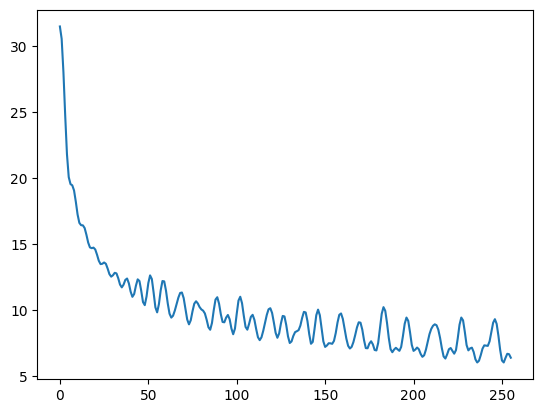

In [34]:
from matplotlib import pyplot as plt
import numpy as np


def s(m, d=128):
    theta_i = lambda i: 10000 ** (-2 * i / d)
    return np.sum([np.abs(np.sum(np.exp(1j * m * theta_i(np.arange(0, j))))) for j in range(0, d // 2)])

d = 128
xs = np.arange(256)
ys = [s(x) / (d // 2) for x in xs]
plt.plot(xs, ys)

## 扩展:Transformer中的SinPositionEncoding的复数与极坐标实现
$$
\begin{split}
PE(t,2i)&=\sin\left(\frac{t}{10000^{\frac{2i}{d_{model}}}}\right)\\
PE(t,2i+1)&=\cos\left(\frac{t}{10000^{\frac{2i}{d_{model}}}}\right)\\
\end{split}
$$

In [35]:
import torch
from torch import nn

class SinPositionEncoding(nn.Module):
    def __init__(self, max_sequence_length, d_model, base=10000):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
        self.base = base
        self.precompute_freqs_cis()
    
    def precompute_freqs_cis(self):
        # i是词向量中每个维度的位置下标
        # 计算公式中的 1/(10000^(2i/d_model))
        # 得到一个(d_model/2,)维的向量
        freqs = 1.0 / (self.base ** (torch.arange(0, self.d_model, 2)[: (self.d_model // 2)].float() / self.d_model))
        # 初始化一个tensor [0, 1, 2, 3, ...],(max_sequence_length,)维
        t = torch.arange(self.max_sequence_length, device=freqs.device, dtype=torch.float32)
        # (max_sequence_length,) X (d_model/2,) -> (max_sequence_length, d_model/2)
        # 新的freqs第0行是freqs*0,第1行是freqs*1,第2行是freqs*2,...
        freqs = torch.outer(t, freqs).float()
        # 通过复平面极坐标计算sin和cos
        # 通过polar函数,将长度为1的向量逆时针旋转freqs度
        # freqs_cis的shape是(max_sequence_length, d_model/2)
        # 每个元素是一个复数,实部是cos,虚部是sin
        freqs_cis = torch.polar(torch.ones_like(freqs), freqs)
        # 将复数转换为实部和虚部,cos_sin的shape是(max_sequence_length, d_model/2, 2)
        # 第三个维度先是cos,再是sin
        cos_sin = torch.view_as_real(freqs_cis)
        # 将cos_sin的第三个维度翻转,变成先sin, 再是cos
        sin_cos = torch.flip(cos_sin, dims=(2, ))
        # 将sin_cos的维度展平,变成(max_sequence_length, d_model)的形状
        pe = sin_cos.flatten(start_dim=1, end_dim=2)
        # print(freqs_cis)
        # 如果一个参数不参与梯度下降,但又希望保存model的时候将其保存下来
        # 这个时候就可以用register_buffer
        self.register_buffer("pe", pe)  
    
    def forward(self):
        print(self.pe)
    

spe = SinPositionEncoding(max_sequence_length=10, d_model=6)
spe()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])
